<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/PH%20sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd 
from pandas import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [6]:
import pandas as pd
df=pd.read_csv('PH.csv',index_col='created_at'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (60169, 1)


,PH
created_at,
2022-03-27 15:07:07+00:00,7.11
2022-03-27 15:07:34+00:00,7.13
2022-03-27 15:07:53+00:00,7.13
2022-03-27 15:08:24+00:00,7.15
2022-03-27 15:08:40+00:00,7.14
...,...
2022-04-12 18:10:02+00:00,7.49
2022-04-12 18:10:18+00:00,7.50
2022-04-12 18:10:34+00:00,7.50


Text(0.5, 0, 'Date for Collected data')

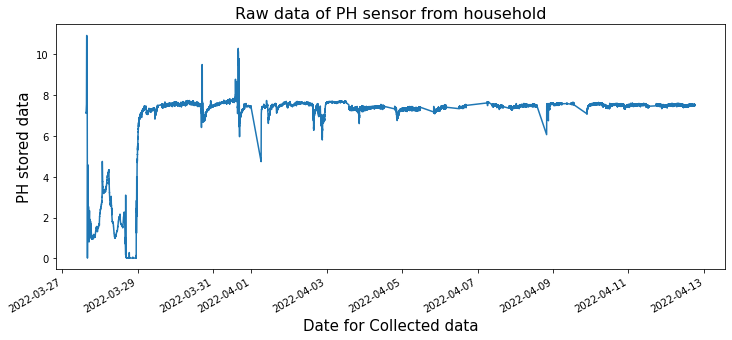

In [7]:
df['PH'].plot(figsize=(12,5))
plt.title("Raw data of PH sensor from household", fontsize=16)
plt.ylabel("PH stored data", fontsize=15)
plt.xlabel("Date for Collected data", fontsize=15)

In [8]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
test_result=adfuller(df['PH'])

In [21]:

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(	PH):
    result=adfuller(	PH)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [22]:
adfuller_test(df['PH'])

ADF Test Statistic : -2.6833461894358073
p-value : 0.07696470683003094
#Lags Used : 60
Number of Observations Used : 60108
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [23]:
df['PH First Difference'] = df['PH'] - df['PH'].shift(1)

In [24]:
df['PH'].shift(1)

created_at
2022-03-27 15:07:07+00:00     NaN
2022-03-27 15:07:34+00:00    7.11
2022-03-27 15:07:53+00:00    7.13
2022-03-27 15:08:24+00:00    7.13
2022-03-27 15:08:40+00:00    7.15
                             ... 
2022-04-12 18:10:02+00:00    7.51
2022-04-12 18:10:18+00:00    7.49
2022-04-12 18:10:34+00:00    7.50
2022-04-12 18:10:50+00:00    7.50
2022-04-12 18:11:06+00:00    7.52
Name: PH, Length: 60169, dtype: float64

In [25]:
df['Seasonal First Difference']=df['PH']-df['PH'].shift(12)

In [26]:
df.head(14)

,PH,PH First Difference,Seasonal First Difference
created_at,,,
2022-03-27 15:07:07+00:00,7.11,NaN,NaN
2022-03-27 15:07:34+00:00,7.13,0.02,NaN
2022-03-27 15:07:53+00:00,7.13,0.00,NaN
2022-03-27 15:08:24+00:00,7.15,0.02,NaN
2022-03-27 15:08:40+00:00,7.14,-0.01,NaN
2022-03-27 15:21:48+00:00,7.55,0.41,NaN
2022-03-27 15:22:26+00:00,8.14,0.59,NaN
2022-03-27 15:22:41+00:00,8.23,0.09,NaN
2022-03-27 15:23:09+00:00,8.62,0.39,NaN


In [27]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -44.403944730973535
p-value : 0.0
#Lags Used : 60
Number of Observations Used : 60096
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


ARIMA Model

In [28]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['PH'],order=(3,1,2))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.PH   No. Observations:                60168
Model:                 ARIMA(3, 1, 2)   Log Likelihood               80935.839
Method:                       css-mle   S.D. of innovations              0.063
Date:                Wed, 22 Jun 2022   AIC                        -161857.678
Time:                        04:27:54   BIC                        -161794.643
Sample:                             1   HQIC                       -161838.101
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.292e-06      0.000     -0.045      0.964      -0.000       0.000
ar.L1.D.PH     0.7778      0.099      7.855      0.000       0.584       0.972
ar.L2.D.PH     0.0555      0.074      0.755      0.450      -0.089       0.200
ar.L3.D.PH     0.0173      0.010      1.728      0.084      -0.002       0.037
ma.L1.D.PH    -0.9476      0.099     -9.575      0.000      -1.142      -0.754
ma.L2.D.PH     0.0280      0.090      0.311      0.756      -0.148       0.204
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1560           -0.0000j            1.1560           -0.0000
AR.2           -2.1838           -6.7302j            7.0756           -0.2999
AR.3           -2.1838           +6.7302j            7.0756            0.2999
MA.1            1.0905           +0.0000j            1.0905            0.0000
MA.2           32.7667           +0.0000j           32.7667            0.0000
-----------------------------------------------------------------------------
"""

In [70]:
predictions = model.predict(start=56000,end=59000)

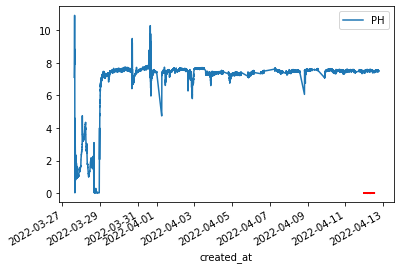

In [71]:
df['PH'].plot(legend=True)
plt.plot(predictions,color='red')

 Accuracy Metric

Recheck it 

In [39]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(60169, 3)
(60139, 3) (30, 3)


In [40]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['PH'],order=(3,1,2))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.PH   No. Observations:                60138
Model:                 ARIMA(3, 1, 2)   Log Likelihood               80883.246
Method:                       css-mle   S.D. of innovations              0.063
Date:                Wed, 22 Jun 2022   AIC                        -161752.492
Time:                        04:40:05   BIC                        -161689.462
Sample:                             1   HQIC                       -161732.916
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.402e-06      0.000     -0.046      0.963      -0.000       0.000
ar.L1.D.PH     0.7780      0.099      7.851      0.000       0.584       0.972
ar.L2.D.PH     0.0554      0.074      0.753      0.451      -0.089       0.200
ar.L3.D.PH     0.0172      0.010      1.724      0.085      -0.002       0.037
ma.L1.D.PH    -0.9477      0.099     -9.569      0.000      -1.142      -0.754
ma.L2.D.PH     0.0281      0.090      0.312      0.755      -0.148       0.205
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1560           -0.0000j            1.1560           -0.0000
AR.2           -2.1841           -6.7371j            7.0823           -0.2999
AR.3           -2.1841           +6.7371j            7.0823            0.2999
MA.1            1.0905           +0.0000j            1.0905            0.0000
MA.2           32.6495           +0.0000j           32.6495            0.0000
-----------------------------------------------------------------------------
"""

In [53]:

pred=model.predict(start=57600,end=60100,typ='levels').rename('ARIMA Predictions')
#pred.plot(legend=True)
#df['PH'].plot(legend=True, color='red')

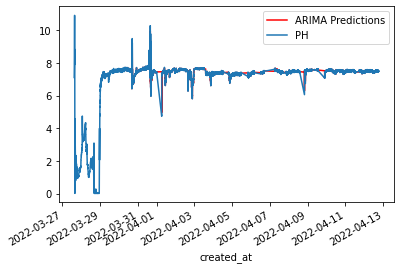

In [66]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=10000,end=60100,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, color="red")
df['PH'].plot(legend=True)

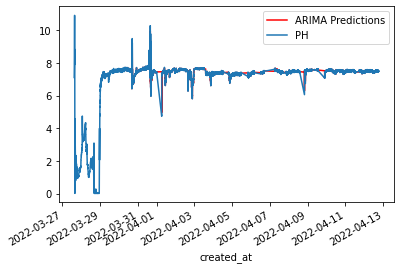

In [68]:
pred.plot(legend=True,color='red')
df['PH'].plot(legend=True)

In [72]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['PH'].plot(legend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f1fd73b57a0> (for post_execute):


ValueError: ignored

ValueError: ignored

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt
df['PH'].mean()
rmse=sqrt(mean_squared_error(pred,test['PH']))
print(rmse)

0.021022204116843773
